In [1]:
import pandas as pd

data_df = pd.read_csv("c3_electric-cars.csv")

print("Shape:", data_df.shape)

Shape: (57, 2)


In [2]:
data_df.head()

,Temperature [°F],Energy Consumption [Wh/mil]
0,-15,460
1,-12,398
2,-8,460
3,-7,540
4,-6,347


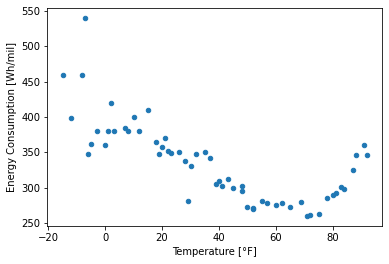

In [4]:
# extract x, y data
x = data_df.iloc[:, 0].values
y = data_df.iloc[:, 1].values

%matplotlib inline
import matplotlib.pyplot as plt

data_df.plot.scatter("Temperature [°F]", "Energy Consumption [Wh/mil]")
plt.show()

In [5]:
from sklearn.preprocessing import PolynomialFeatures

In [6]:
import numpy as np

# Create the object
pf_obj = PolynomialFeatures(degree=2)

# Create the polynomial features
X2 = pf_obj.fit_transform(
    # Pass two dimensional array
    x[:, np.newaxis]  # (57,) -> (57,1)
)

print("Shape:", X2.shape)

Shape: (57, 3)


In [ ]:
### alternative way of doing line by line 

# Fit the preprocessor
pf_obj.fit(x[:, np.newaxis])

# Create the polynomial features
X2 = pf_obj.transform((x[:, np.newaxis]))

### In this code, fit() computes the number of output features and transform() creates them

In [8]:
# Scikit-learn labels each new feature in X2, and we can obtain these labels with the get_feature_names_out() function.

feature_names = pf_obj.get_feature_names_out()

print("Features:", feature_names)

Features: ['1' 'x0' 'x0^2']


In [9]:
### Here, x0 denotes temperatures. As we can see, Scikit-learn adds a 1 to the polynomial features which corresponds to the intercept term. 
### However, we will use the LinearRegression object which already fits one. Hence, this new feature is not necessary and we can remove it by setting the include_bias parameter to False.

# Create the object
pf_obj = PolynomialFeatures(degree=2, include_bias=False)

# Create the polynomial features
X2 = pf_obj.fit_transform(x[:, np.newaxis])

# Get feature names
feature_names = pf_obj.get_feature_names_out()

print("Features:", feature_names)

Features: ['x0' 'x0^2']


In [11]:
# ALTERNATIVE Create the polynomial features manually
X2 = np.c_[x, x ** 2]

Fit a LINEAR REGRESSION to new set of features

In [12]:
from sklearn.linear_model import LinearRegression

# Create linear regression
linreg = LinearRegression()

# Fit it
linreg.fit(X2, y)

LinearRegression()

In [13]:
# Generate a hundred values between min(x) and max(x)
x_values = np.linspace(min(x), max(x), num=100)
X_values2 = pf_obj.transform(x_values[:, np.newaxis])

In [14]:
# ALTERNATIVE use numpy c_ 

X_values2 = np.c_[x_values, x_values ** 2]

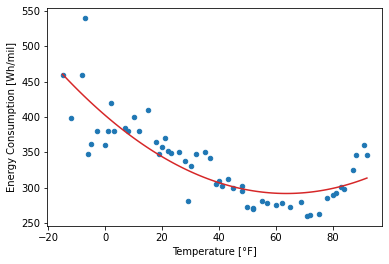

In [16]:
# Compute predictions
y_values = linreg.predict(X_values2)

# Plot predictions
data_df.plot.scatter("Temperature [°F]", "Energy Consumption [Wh/mil]")
plt.plot(x_values, y_values, color="C3")
plt.show()

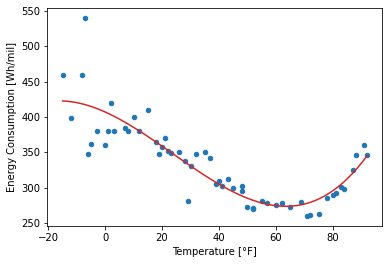

In [18]:
# improve fit by increasing degree of set of polynomial features

# Create the object
pf_obj = PolynomialFeatures(degree=3, include_bias=False)

# Create the polynomial features
X2 = pf_obj.fit_transform(x[:, np.newaxis])

# Fit it
linreg.fit(X2, y)

x_values = np.linspace(min(x), max(x), num=100)
X_values2 = pf_obj.transform(x_values[:, np.newaxis])

# Compute predictions
y_values = linreg.predict(X_values2)

# Plot predictions
data_df.plot.scatter("Temperature [°F]", "Energy Consumption [Wh/mil]")
plt.plot(x_values, y_values, color="C3")
plt.show()

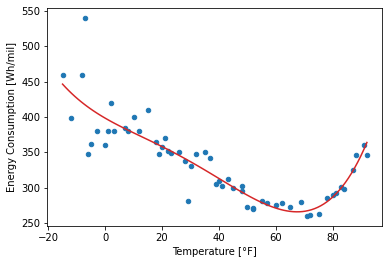

In [19]:
# improve fit by increasing degree of set of polynomial features

# Create the object
pf_obj = PolynomialFeatures(degree=4, include_bias=False)

# Create the polynomial features
X2 = pf_obj.fit_transform(x[:, np.newaxis])

# Fit it
linreg.fit(X2, y)

x_values = np.linspace(min(x), max(x), num=100)
X_values2 = pf_obj.transform(x_values[:, np.newaxis])

# Compute predictions
y_values = linreg.predict(X_values2)

# Plot predictions
data_df.plot.scatter("Temperature [°F]", "Energy Consumption [Wh/mil]")
plt.plot(x_values, y_values, color="C3")
plt.show()